In [5]:
import numpy as np
import networkx as nx
import gensim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
import pickle
from sklearn.metrics import normalized_mutual_info_score as NMI
%matplotlib inline

In [6]:
def getNMI(folder,num):
    path = 'data/'+folder+'/'
    emb_file = path+'embedding_run_'+str(num)+'.emb'
    community_file = path+'community_run_'+str(num)+'.dat'
    graph_file = path+'network_run_'+str(num)+'.dat'
    W = pickle.load(open(emb_file, "rb" ))
    G = nx.read_edgelist(graph_file)
    nodes = G.number_of_nodes()
    emb = (W[0:nodes,:] + W[nodes:,:])/2.0
    community_truth_values = []
    for line in open(community_file):
        cols = line.split()
        community_truth_values.append(cols[1])
    num_clusters = len(set(community_truth_values))
    kmeans = KMeans(n_clusters=num_clusters).fit(emb)
    return NMI(community_truth_values,kmeans.labels_)

In [7]:
def getAverageNMI(folder):
    avg = 0
    for i in range(1,6):
        avg += getNMI(folder,i)
    return avg/5.0

In [8]:
getAverageNMI('mu_0.4_N_1000')

0.97136706435614928

In [9]:
def plotNMIGraph():
    x = []
    y = []
    for i in np.arange(0.1,1,0.1):
        x.append(i)
        name = 'mu_'+str(i)+'_N_1000'
        y.append(getAverageNMI(name))
    return x,y

In [10]:
x,y = plotNMIGraph()

In [11]:
x_n,y_n = plotNMIGraph()

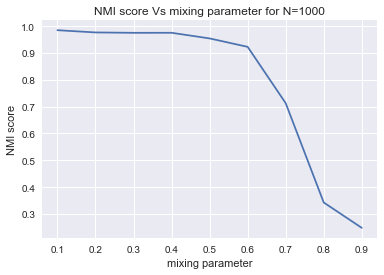

In [16]:
plt.plot(x_n,y_n)
plt.xlabel('mixing parameter')
plt.ylabel('NMI score')
plt.title('NMI score Vs mixing parameter for N=1000')

In [17]:
getNMI('mu_0.5_N_1000',3)

0.96486182791799413

In [18]:
G = nx.read_edgelist('data/train_n2v.txt', nodetype=int, create_using=nx.DiGraph())

In [19]:
nodes = list(G.nodes())
min_label = min(nodes)
print min_label

13


In [18]:
sorted(nodes)

[13,
 14,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 45,
 46,
 62,
 65,
 70,
 71,
 74,
 75,
 78,
 80,
 81,
 82,
 85,
 88,
 93,
 95,
 97,
 98,
 106,
 113,
 114,
 115,
 122,
 123,
 124,
 128,
 135,
 140,
 141,
 142,
 161,
 163,
 164,
 165,
 178,
 179,
 183,
 185,
 187,
 188,
 192,
 193,
 194,
 195,
 197,
 199,
 200,
 205,
 214,
 215,
 231,
 232,
 238,
 244,
 245,
 252,
 253,
 254,
 260,
 267,
 269,
 272,
 281,
 283,
 284,
 293,
 294,
 299,
 302,
 309,
 312,
 315,
 320,
 321,
 339,
 345,
 348,
 350,
 351,
 352,
 357,
 358,
 360,
 364,
 365,
 369,
 372,
 373,
 374,
 375,
 376,
 379,
 380,
 385,
 392,
 396,
 400,
 403,
 408,
 409,
 410,
 414,
 449,
 450,
 482,
 491,
 492,
 495,
 500,
 510,
 523,
 543,
 546,
 547,
 570,
 573,
 574,
 580,
 593,
 598,
 615,
 624,
 628,
 639,
 676,
 677,
 715,
 717,
 727,
 731,
 733,
 734,
 735,
 743,
 748,
 749,
 750,
 751,
 773,
 778,
 782,
 787,
 800,
 811,
 820,
 822,
 824,
 830,
 831,
 832,
 833,
 834,
 836,
 839,
 844,
 851,
 853,
 855,
 864,
 866,
 869,
 880,
 

In [20]:
res = nx.shortest_path(G)

In [21]:
res[24578]

{15198: [24578, 21968, 15198],
 16770: [24578, 16770],
 18067: [24578, 21968, 18067],
 18297: [24578, 18297],
 21968: [24578, 21968],
 24578: [24578]}

In [22]:
dist_cooccur = []
for src in res: 
    for dest in res[src]:
        if src != dest:
            #print 'accessing src : ',src,' dest : ',dest
            path = res[src][dest]
            l = 0
            for i in range(len(path) -1):
                l += G[path[i]][path[i+1]]['weight']
            dist_cooccur.append((int(src)-min_label, int(dest)-min_label, 1.0/l))

In [23]:
G[24578][21968]

{'weight': 2}

In [24]:
d = pickle.load(open('data/embedding_train_n2v.emb', "rb" ))

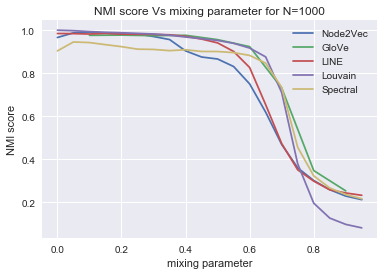

In [28]:
x_n,y_n = plotNMIGraph()
x_n2v, y_n2v = [], []
x_l, y_l = [], []
y_louvain = pickle.load(open("../louvain/Generated Graphs/louvain_scores.pickle",'rb'))
y_spectral = pickle.load(open("../spectral/Generated Graphs/spectral_scores.pickle",'rb'))
x_lou_spec = [0.05*i for i in range(20)]
doc = open("../node2vec Evaluation/results.txt", "r")
for line in doc:
    x_n2v.append(float(line.split()[1].split("/")[1].split("_")[1]))
    y_n2v.append(float(line.split()[2]))
doc.close()
doc = open("../LINE Evaluation/results.txt", "r")
for line in doc:
    x_l.append(float(line.split()[3].split("/")[1].split("_")[1]))
    y_l.append(float(line.split()[4]))
doc.close()
n2v, = plt.plot(x_n2v, y_n2v)
glove, = plt.plot(x_n,y_n)
line, = plt.plot(x_l, y_l)
louvain, = plt.plot(x_lou_spec,y_louvain)
spectral, = plt.plot(x_lou_spec,y_spectral)
plt.xlabel('mixing parameter')
plt.ylabel('NMI score')
plt.title('NMI score Vs mixing parameter for N=1000')
plt.legend([n2v, glove, line, louvain, spectral,], ["Node2Vec", "GloVe", "LINE","Louvain","Spectral"])